## station1은 depart, sunrise, sunset, snowfall이 모두 nan값이라 dropna불가

In [231]:
weather = pd.read_csv("weather_imputation.csv")

In [232]:
station = weather[weather['station_nbr'] == 1]
station.reset_index(drop=True, inplace=True)
station.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
1030,1,2014-10-27,61.0,41.0,51.0,NaN,38.0,44.0,14.0,0.0,NaN,NaN,MD,NaN,0.00,29.70,29.89,6.3,27.0,7.3
1031,1,2014-10-28,65.0,37.0,51.0,NaN,45.0,48.0,14.0,0.0,NaN,NaN,BR,NaN,0.00,29.86,30.02,1.4,9.0,3.6
1032,1,2014-10-29,66.0,48.0,57.0,NaN,51.0,53.0,8.0,0.0,NaN,NaN,RA FG+ FG BR,NaN,0.11,29.70,29.86,2.9,27.0,4.4
1033,1,2014-10-30,57.0,39.0,48.0,NaN,39.0,43.0,17.0,0.0,NaN,NaN,MD,NaN,0.00,29.78,29.95,2.1,28.0,3.7
1034,1,2014-10-31,53.0,40.0,46.5,NaN,36.0,41.0,18.0,0.0,NaN,NaN,MD,NaN,0.00,29.87,30.03,5.4,4.0,5.8


In [233]:
station['date'] = pd.to_datetime(station['date'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [234]:
for i in station.columns:
    count_null = station[i].isna().sum()
    print(i, ":", count_null, "(",round((count_null / len(station) * 100),2),"%",")")

station_nbr : 0 ( 0.0 % )
date : 0 ( 0.0 % )
tmax : 2 ( 0.19 % )
tmin : 2 ( 0.19 % )
tavg : 2 ( 0.19 % )
depart : 1035 ( 100.0 % )
dewpoint : 6 ( 0.58 % )
wetbulb : 11 ( 1.06 % )
heat : 6 ( 0.58 % )
cool : 6 ( 0.58 % )
sunrise : 1035 ( 100.0 % )
sunset : 1035 ( 100.0 % )
codesum : 0 ( 0.0 % )
snowfall : 1035 ( 100.0 % )
preciptotal : 5 ( 0.48 % )
stnpressure : 4 ( 0.39 % )
sealevel : 8 ( 0.77 % )
resultspeed : 4 ( 0.39 % )
resultdir : 4 ( 0.39 % )
avgspeed : 3 ( 0.29 % )


#### 값 대체 시작 (전체 nan인 column은 제외)
- tmin = -100, preciptotal = 10, 나머지 100 

In [235]:
station.tmax[station['tmax'].isna()] = 100

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5984: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2910: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [236]:
station.tmin[station.tmin == 100] = -100

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5984: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2910: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [237]:
station.tavg[station.tavg.isna()] = 100

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5984: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2910: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [238]:
station.heat[station.heat.isna()] = 100

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5984: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2910: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [239]:
station.cool.unique()

array([  0.,  nan,   5.,   6.,   2.,   1.,  12.,   3.,   4.,   9.,  16.,
        20.,  18.,  10.,   7.,   8.,  13.,  14.,  11.,  15.,  17.,  19.,
        21.])

In [240]:
station.cool[station.cool.isna()] = 100

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5984: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2910: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [241]:
station.dewpoint[station.dewpoint.isna()] = 100

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5984: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2910: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [242]:
station.wetbulb[station.wetbulb.isna()] = 100

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5984: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2910: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [243]:
station.preciptotal[station.preciptotal.isna()] = 10 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5984: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2910: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [244]:
station.stnpressure[station.stnpressure.isna()] = 100

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5984: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2910: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [245]:
station.sealevel[station.sealevel.isna()] = 100

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5984: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2910: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [246]:
station.resultspeed[station.resultspeed.isna()] = 100

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5984: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2910: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [247]:
station.resultdir[station.resultdir.isna()] = 100

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5984: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2910: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [248]:
station.avgspeed[station.avgspeed.isna()] = 100

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5984: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2910: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [162]:
# cols = ['tavg','dewpoint','wetbulb','heat','cool','preciptotal','stnpressure','sealevel','avgspeed']
# sns.pairplot(station[cols])
# plt.plot()

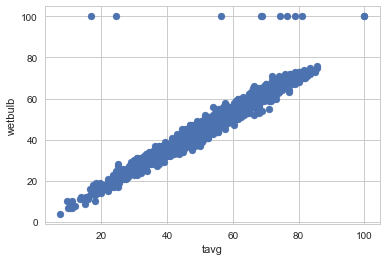

In [170]:
plt.scatter(x=station.tavg, y=station.wetbulb)
plt.xlabel("tavg")
plt.ylabel("wetbulb")
plt.show()

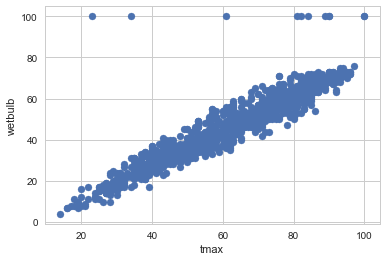

In [172]:
plt.scatter(x=station.tmax, y=station.wetbulb)
plt.xlabel("tmax")
plt.ylabel("wetbulb")
plt.show()

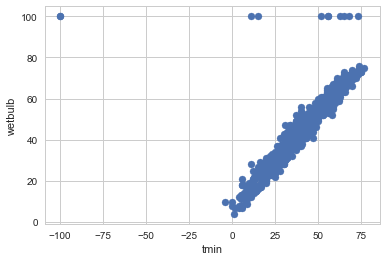

In [173]:
plt.scatter(x=station.tmin, y=station.wetbulb)
plt.xlabel("tmin")
plt.ylabel("wetbulb")
plt.show()

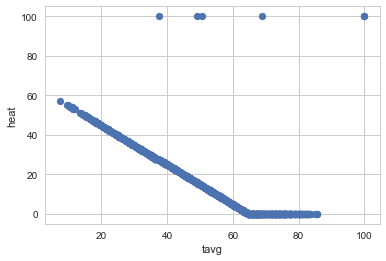

In [275]:
plt.scatter(x=station.tavg, y=station.heat)
plt.xlabel("tavg")
plt.ylabel("heat")
plt.show()

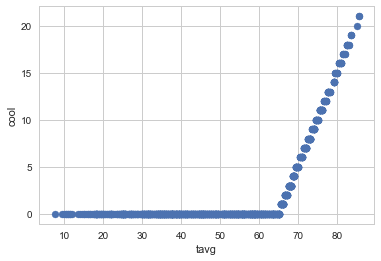

In [169]:
plt.scatter(x=station.tavg, y=station.cool)
plt.xlabel("tavg")
plt.ylabel("cool")
plt.show()

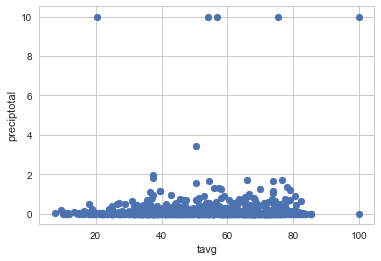

In [163]:
plt.scatter(x=station.tavg, y=station.preciptotal)
plt.xlabel("tavg")
plt.ylabel("preciptotal")
plt.show()

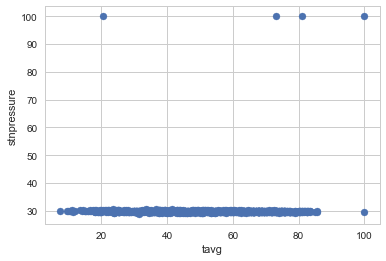

In [165]:
plt.scatter(x=station.tavg, y=station.stnpressure)
plt.xlabel("tavg")
plt.ylabel("stnpressure")
plt.show()

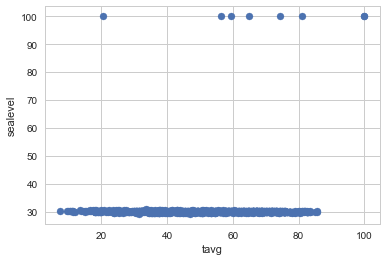

In [174]:
plt.scatter(x=station.tavg, y=station.sealevel)
plt.xlabel("tavg")
plt.ylabel("sealevel")
plt.show()

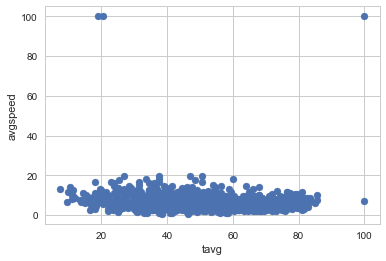

In [175]:
plt.scatter(x=station.tavg, y=station.avgspeed)
plt.xlabel("tavg")
plt.ylabel("avgspeed")
plt.show()

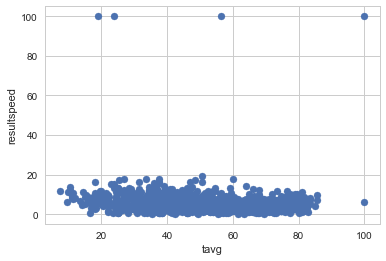

In [176]:
plt.scatter(x=station.tavg, y=station.resultspeed)
plt.xlabel("tavg")
plt.ylabel("resultspeed")
plt.show()

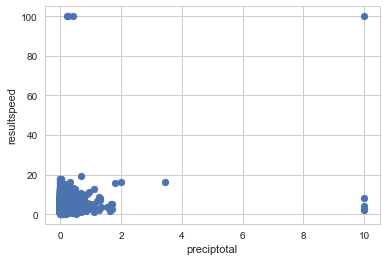

In [180]:
plt.scatter(x=station.preciptotal, y=station.resultspeed)
plt.xlabel("preciptotal")
plt.ylabel("resultspeed")
plt.show()

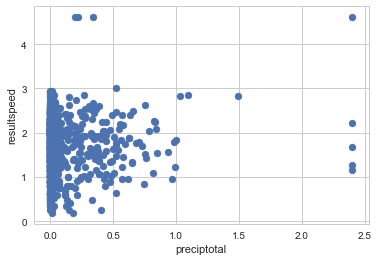

In [181]:
plt.scatter(x=np.log1p(station.preciptotal), y=np.log1p(station.resultspeed))
plt.xlabel("preciptotal")
plt.ylabel("resultspeed")
plt.show()

0       0.048790
1       0.009950
2       0.000000
3       0.000000
4       0.000000
5       0.004988
6       0.000000
7       0.000000
8       0.000000
9       0.004988
10      0.000000
11      0.524729
12      0.019803
13      0.000000
14      0.000000
15      0.048790
16      0.086178
17      0.004988
18      0.019803
19      0.076961
20      0.113329
21      0.004988
22      0.113329
23      0.004988
24      0.000000
25      0.139762
26      0.760806
27      0.000000
28      0.000000
29      0.004988
          ...   
1005    0.139762
1006    0.000000
1007    0.048790
1008    0.000000
1009    0.000000
1010    0.004988
1011    0.029559
1012    2.397895
1013    0.000000
1014    0.157004
1015    0.000000
1016    0.000000
1017    0.000000
1018    0.000000
1019    0.625938
1020    0.004988
1021    0.004988
1022    0.000000
1023    0.000000
1024    0.039221
1025    0.518794
1026    1.492904
1027    0.067659
1028    0.000000
1029    0.004988
1030    0.000000
1031    0.000000
1032    0.1043

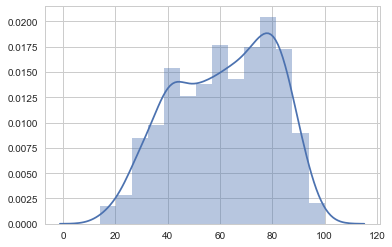

In [249]:
sns.distplot(station.tmax.values, kde=True)
plt.show()

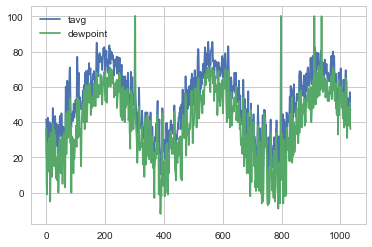

In [222]:
cols = ['tavg','dewpoint']
station[cols].plot()
plt.show()

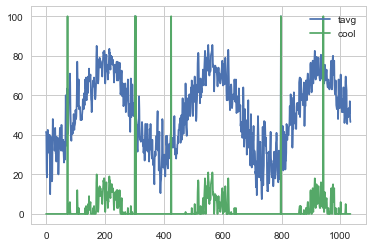

In [250]:
cols = ['tavg','cool']
station[cols].plot()
plt.show()

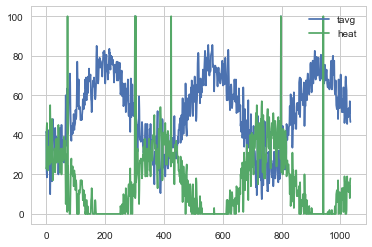

In [251]:
cols = ['tavg','heat']
station[cols].plot()
plt.show()

In [252]:
station.tavg.values

array([ 41.5,  40.5,  21.5, ...,  57. ,  48. ,  46.5])

In [253]:
station.heat.values

array([ 23.,  24.,  43., ...,   8.,  17.,  18.])

In [254]:
station.cool.unique()

array([   0.,  100.,    5.,    6.,    2.,    1.,   12.,    3.,    4.,
          9.,   16.,   20.,   18.,   10.,    7.,    8.,   13.,   14.,
         11.,   15.,   17.,   19.,   21.])

#### 65 - heat = tavg 관계

In [273]:
65 - station.tavg.values

array([ 23.5,  24.5,  43.5, ...,   8. ,  17. ,  18.5])

In [267]:
station['tavg-cool'] = station["tavg"]- station["cool"]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


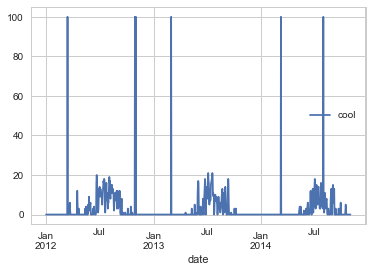

In [272]:
station.plot(x="date", y="cool")
plt.show()

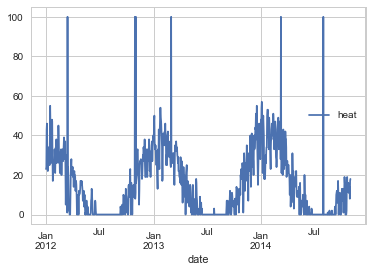

In [270]:
station.plot(x="date", y="heat")
plt.show()

In [229]:
station.columns

Index(['station_nbr', 'date', 'tmax', 'tmin', 'tavg', 'depart', 'dewpoint',
       'wetbulb', 'heat', 'cool', 'sunrise', 'sunset', 'codesum', 'snowfall',
       'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir',
       'avgspeed'],
      dtype='object')

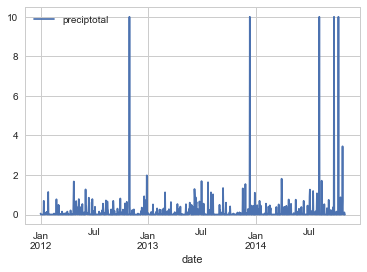

In [256]:
station.plot(x='date', y='preciptotal')
plt.show()

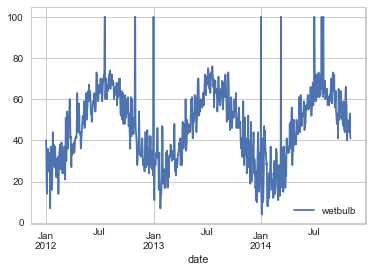

In [257]:
station.plot(x='date', y='wetbulb')
plt.show()

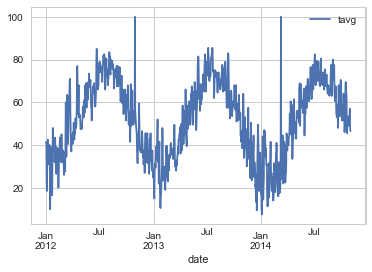

In [259]:
station.plot(x='date', y='tavg')
plt.show()

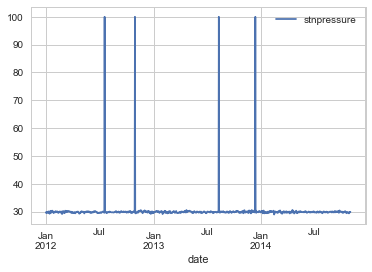

In [277]:
station.plot(x='date', y='stnpressure')
plt.show()

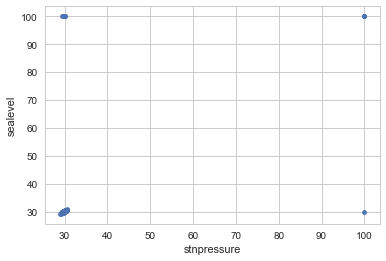

In [282]:
station.plot.scatter(x='stnpressure', y='sealevel')
plt.show()

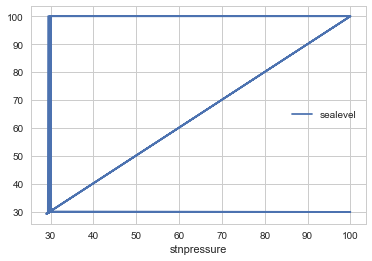

In [283]:
station.plot(x='stnpressure', y='sealevel')
plt.show()

In [280]:
station.sealevel.values

array([ 29.92,  29.62,  29.87, ...,  29.86,  29.95,  30.03])

In [281]:
station.stnpressure.values

array([ 29.78,  29.44,  29.67, ...,  29.7 ,  29.78,  29.87])

##### stnpressure와 sealevel은 거의 동일한 수치로 나타난다.

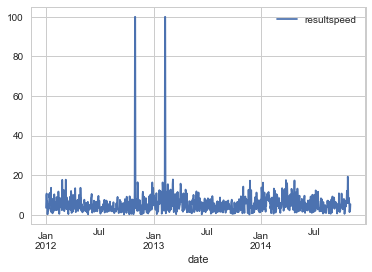

In [284]:
station.plot(x='date', y='resultspeed')
plt.show()

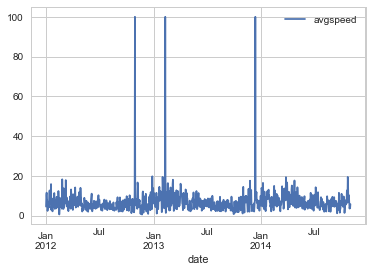

In [285]:
station.plot(x='date', y='avgspeed')
plt.show()

In [286]:
station.resultspeed.values

array([  3.6,   9.8,  10.8, ...,   2.9,   2.1,   5.4])

In [287]:
station.avgspeed.values

array([  4.6,  10.3,  11.6, ...,   4.4,   3.7,   5.8])

In [ ]:
station.pivot_table(index='date')